In [1]:
from sklearn.naive_bayes import GaussianNB
import os
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

Number of Selected Features: 24
SVM Accuracy: 57.404761904761905
SVM Precision: 58.105147864184005
SVM Recall: 50.88729016786571
SVM F1 Score: 54.25722321656864


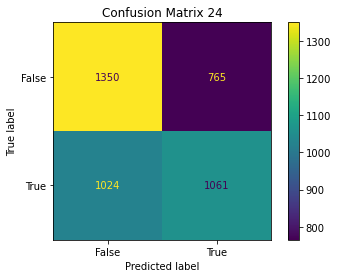

In [7]:
# Set working directory
os.chdir('C:/Users/jesse/OneDrive/Documenten/Thesis/amazon_code/dataframes_done')

# Read JSON file
df = pd.read_json('VADER_df_norm.json', orient='records')

# Assign X and y
X = df.drop(['Label'], axis=1)
y = df['Label']

# training and test set
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

# SVM
svm = SVC(kernel='linear')

for n_features_to_select in n_features_range:
    rfe = RFE(svm, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    svm.fit(X_train_transformed, y_train)
    predictions = svm.predict(X_test_transformed)

    svm_accuracy = accuracy_score(y_test, predictions) * 100
    svm_precision = precision_score(y_test, predictions) * 100
    svm_recall = recall_score(y_test, predictions) * 100
    svm_f1_score = f1_score(y_test, predictions) * 100

    print(f"Number of Selected Features: {n_features_to_select}")
    print(f"SVM Accuracy: {svm_accuracy}")
    print(f"SVM Precision: {svm_precision}")
    print(f"SVM Recall: {svm_recall}")
    print(f"SVM F1 Score: {svm_f1_score}")

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title("Confusion Matrix " + str(n_features_to_select))  
    plt.show()
    print()

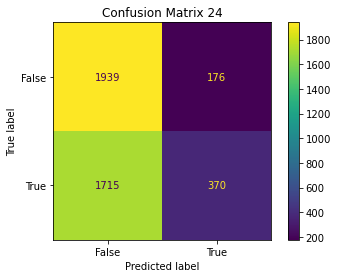

Number of Selected Features: 24
Accuracy: 54.97619047619048
Precision: 67.76556776556777
Recall: 17.74580335731415
F1 Score: 28.12618776130749



KeyboardInterrupt: 

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Set working directory
os.chdir('C:/Users/jesse/OneDrive/Documenten/Thesis/amazon_code/dataframes_done')

# Read JSON file
df = pd.read_json('VADER_df_norm.json', orient='records')

# Train and test set
X = df.drop(['Label'], axis=1)
y = df['Label']
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

for n_features_to_select in n_features_range:
    regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
    rfe = RFE(regressor, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    selected_features = X.columns[rfe.support_].tolist()

    # GNB
    gnb1 = GaussianNB()
    gnb1.fit(X_train_transformed, y_train)
    predictions = gnb1.predict(X_test_transformed)

    # Evaluate
    gnb_accuracy = accuracy_score(y_test, predictions) * 100
    gnb_precision = precision_score(y_test, predictions) * 100
    gnb_recall = recall_score(y_test, predictions) * 100
    gnb_f1_score = f1_score(y_test, predictions) * 100

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title("Confusion Matrix " + str(n_features_to_select))  
    plt.show()

    print(f"Number of Selected Features: {n_features_to_select}")
    print("Accuracy:", gnb_accuracy)
    print("Precision:", gnb_precision)
    print("Recall:", gnb_recall)
    print("F1 Score:", gnb_f1_score)
    print()